# Oasis Infobyte(Data Science)

Batch - January Phase 1 AICTE OIB-SIP 2024.

Task 3: Car Price Prediction Using Machine Learning

Made By: Ronil Shah

# Problem Statement: 

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

## 1. Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [2]:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.duplicated().sum()

2

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [11]:
data['Year'].value_counts()

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [12]:
data['Car_Name'].value_counts(ascending=True)

Bajaj Avenger 150 street     1
KTM RC390                    1
Hyosung GT250R               1
Suzuki Access 125            1
KTM 390 Duke                 1
                            ..
fortuner                    10
brio                        10
verna                       14
corolla altis               16
city                        26
Name: Car_Name, Length: 98, dtype: int64

In [13]:
data['Selling_Price'].value_counts()

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

In [14]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [15]:
data['Selling_type'].value_counts()

Dealer        193
Individual    106
Name: Selling_type, dtype: int64

In [16]:
data['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [17]:
data['Owner'].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

In [18]:
data[['Year','Car_Name','Selling_Price','Present_Price']]

,Year,Car_Name,Selling_Price,Present_Price
0,2014,ritz,3.35,5.59
1,2013,sx4,4.75,9.54
2,2017,ciaz,7.25,9.85
3,2011,wagon r,2.85,4.15
4,2014,swift,4.60,6.87
...,...,...,...,...
296,2016,city,9.50,11.60
297,2015,brio,4.00,5.90
298,2009,city,3.35,11.00
299,2017,city,11.50,12.50


Encoding Fuel_Type, Selling_type, Transmission columns
For this, we use the Label Encoder function

In [19]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [20]:
fuel_encoded = LabelEncoder()
data['Fuel_Type']=fuel_encoded.fit_transform(data['Fuel_Type'])

In [21]:
data['Selling_type'].value_counts()

Dealer        193
Individual    106
Name: Selling_type, dtype: int64

In [22]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,2,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,2,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


We encode 'Dealer' and 'Individual' using Label Encoder 

In [23]:
selling_encoded=LabelEncoder()
data['Selling_type'] = selling_encoded.fit_transform(data['Selling_type'])
selling_encoded.classes_

array(['Dealer', 'Individual'], dtype=object)

In [24]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,2,0,Manual,0
298,city,2009,3.35,11.00,87934,2,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [25]:
data['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

We encode 'Manual' and 'Automatic' using label encoder

In [26]:
transmission_encoded = LabelEncoder()
data['Transmission']=transmission_encoded.fit_transform(data['Transmission'])
transmission_encoded.classes_

array(['Automatic', 'Manual'], dtype=object)

In [27]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int32  
 6   Selling_type   299 non-null    int32  
 7   Transmission   299 non-null    int32  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 19.9+ KB


In [29]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

### Splitting Data into training data and testing data

In [30]:
X= data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y= data['Selling_Price']

In [31]:
print(X.shape)
X.head()

(299, 7)


,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [32]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(f"X:{X.shape}, X_train:{X_train.shape},X_test:{X_test.shape}")
print(f"Y:{Y.shape}, Y_train:{Y_train.shape},Y_test:{X_test.shape}")

X:(299, 7), X_train:(239, 7),X_test:(60, 7)
Y:(299,), Y_train:(239,),Y_test:(60, 7)


### Model Training
#### 1. Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [36]:
linear_model.fit(X_train,Y_train)

LinearRegression()

#### Model Evaluation

In [37]:
#Prediction on training data
training_prediction = linear_model.predict(X_train)
print(training_prediction)

[ 9.74368860e-01  1.02578732e+00  2.80956678e+00  2.11382658e+00
  3.56149792e+00  1.77573643e+00  3.23917090e+00 -1.82552319e+00
  2.00928212e+00  2.10069432e+00  7.20704750e+00  5.76640733e+00
  3.08684040e-01  5.25230865e+00  2.86515104e+00  7.56577443e-01
  9.68869580e+00  4.87897925e+00  2.42347265e+00  4.47021986e+00
  1.86897326e+00  5.83482560e+00  5.24818569e+00  7.72059415e+00
  5.70120314e+00  1.14877421e+00  9.12963323e+00  7.37634771e+00
  5.32430077e+00  2.02430582e+00  5.79061255e+00  2.34603294e+00
  5.75734568e-01  3.25342249e+00  4.21231284e+01  9.63284991e+00
  2.09335657e+00  3.46674237e+00  7.80309300e+00  4.66011107e+00
  4.22749846e-01  5.04129486e+00  5.59008239e+00  3.40290261e-01
  1.45577117e+00  8.13967504e+00  5.43834811e+00  1.59311225e+00
  7.60991708e+00  8.65392145e+00  2.39273921e+00 -3.76073573e-01
  1.45354004e+00  8.88047529e+00  1.85077713e+00  7.06957427e+00
  1.02291282e+01  6.01203312e+00  8.67116381e-01  1.66042155e+00
 -8.41748628e-01  1.96506

In [38]:
#Model evaluation using R-squared error
training_error = r2_score(Y_train,training_prediction)
print(training_error)

0.8826669853800184


To visualise the accuracy of prediction on the training data, we use a scatterplot

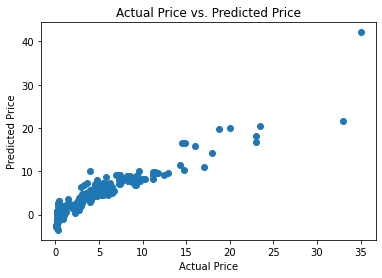

In [39]:
mpl.scatter(Y_train,training_prediction)
mpl.xlabel("Actual Price")
mpl.ylabel("Predicted Price")
mpl.title("Actual Price vs. Predicted Price")
mpl.show()

In [40]:
#prediction for testing data 
testing_prediction = linear_model.predict(X_test)
print(testing_prediction)

[ 1.2724863   7.21159494  6.00479623  6.98493219 -0.72411819  2.22638403
 -0.35786699  0.18448228  2.95174049  1.54417009  5.22383444  4.45713812
  4.89539497  6.23528501 11.03173117  6.27442781  6.30663735 16.21784211
  3.62632817  4.22945371  2.11588252  2.55034131  4.52178424  0.69699288
  0.90235045  2.00171262  7.08938345  4.26806283  1.18461467  0.04046209
  0.82917947 10.11564889  5.95571156  2.562155    7.48558281  9.57190879
  3.24050957  1.8351179   2.06000376  6.46649418  7.6938207   4.33568714
  1.52227215  2.0377353  -0.40633508  4.77444474 -1.88660319  5.53778339
  7.37346332  1.88823146  1.70242295  2.48970259  4.31084188 10.35330441
  0.80224925 14.31220416  1.81710703  3.68239551  1.91047211  5.63562947]


In [41]:
#Model evaluation using R-squared error
testing_error = r2_score(Y_test,testing_prediction)
print(testing_error)

0.7895425396612561


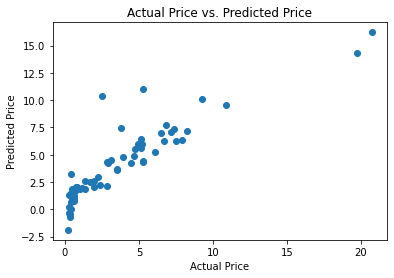

In [42]:
mpl.scatter(Y_test,testing_prediction)
mpl.xlabel("Actual Price")
mpl.ylabel("Predicted Price")
mpl.title("Actual Price vs. Predicted Price")
mpl.show()

#### 2. Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

In [44]:
lasso_model.fit(X_train,Y_train)

Lasso()

#### Model Evaluation

In [45]:
#Prediction on training data
lasso_training_prediction = lasso_model.predict(X_train)
print(lasso_training_prediction)

[ 3.13144082  1.63906725  2.79678713  2.72829095  3.81409616  2.34418161
  2.32180856 -0.49538901  2.20445279  2.30937616  6.8771999   4.41558088
  1.13848878  5.56360528  2.05674046  1.50046449  8.70062496  3.72080046
  2.68807028  4.38017074  2.44508644  5.6124083   4.9519029   6.4708996
  5.6118355   1.78447586  9.95549437  7.81879453  4.13130894  2.46668952
  4.44199816  2.89201949  1.44566001  3.77678276 46.20905182  8.336747
  2.54783606  3.54181258  6.41727835  3.08709375  0.73493207  5.17207991
  4.20468846  1.18720944  2.13454253  7.16969888  5.4750161   2.1302856
  6.4125996   9.56749296  2.88782961  0.51410479  2.13181968  7.33021633
  2.26857757  7.01311933  9.16370781  6.72599181  1.08155726  2.3675126
  0.31373241  1.34416774  1.81259424  2.33814565  5.02540821  1.47654701
  4.33372117  6.02618924  7.68315854  1.94388048  1.75180167  8.97459628
  4.75129461  5.74969363  3.62680439  4.74419444  2.99693405  1.72713943
  7.89574867  4.13220088  8.20204183  6.56707716  4.9969

In [46]:
#Model evaluation using R-squared error
lasso_training_error = r2_score(Y_train,lasso_training_prediction)
print(lasso_training_error)

0.8525498915483165


To visualise the accuracy of prediction on the training data, we use a scatterplot

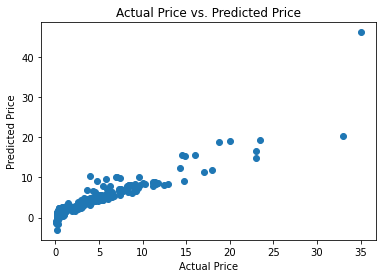

In [47]:
mpl.scatter(Y_train,lasso_training_prediction)
mpl.xlabel("Actual Price")
mpl.ylabel("Predicted Price")
mpl.title("Actual Price vs. Predicted Price")
mpl.show()

In [48]:
#prediction for testing data 
lasso_testing_prediction = lasso_model.predict(X_test)
print(lasso_testing_prediction)

[ 1.75695055  5.88797197  4.99286545  5.64219002  0.27109557  2.45144764
 -0.33773704  1.00721078  3.42734748  2.07446014  5.22922827  4.52163091
  4.84830929  6.37421166 11.04820189  6.42198132  6.15034287 14.42090842
  4.97137991  3.95116475  2.34547663  2.83390895  3.31649828  1.43348565
  1.66224447  2.66670953  5.91186398  4.30649763  1.83211866  1.0037069
  1.58543755  9.96352327  4.93296277  2.68662121  8.71932291  8.47158841
  2.32344227  2.56236559  2.5102551   5.42335963  6.43822541  4.22379431
  2.05905559  2.48424978  0.64865075  4.71631548 -0.5684865   4.88329841
  5.98768544  2.31350599  2.26329748  2.99757594  3.89033308  9.96048374
  1.54827842 13.69130004  2.3911571   3.80382357  2.49573143  4.16868929]


In [49]:
#Model evaluation using R-squared error
lasso_testing_error = r2_score(Y_test,lasso_testing_prediction)
print(lasso_testing_error)

0.7386739340123807


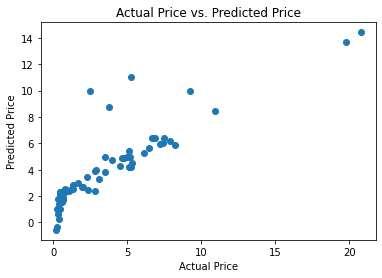

In [50]:
mpl.scatter(Y_test,lasso_testing_prediction)
mpl.xlabel("Actual Price")
mpl.ylabel("Predicted Price")
mpl.title("Actual Price vs. Predicted Price")
mpl.show()